<a href="https://colab.research.google.com/github/Jinyu-Luo/CHL5230-Datathon4/blob/main/16_CHL5230_Datathon4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Next Step:

- Determine features to be included.

- Remove all the columns with over 60% of missing values.

- Do EDA separately.



In [ ]:
!pip install torch
!pip install statsmodels
!pip install category_encoders

In [138]:
# importing PyTorch library as 't' for convenience
import torch as t

# importing other necessary libraries
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import roc_auc_score, accuracy_score

# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

import io
import seaborn as sns

from statsmodels.imputation import mice
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
# upload the data
from google.colab import files
uploaded = files.upload()

Saving datathon4.csv to datathon4.csv


In [51]:
df = pd.read_csv(io.BytesIO(uploaded['datathon4.csv']))
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [ ]:
df.shape

(91713, 186)

In [ ]:
df.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['apache_3j_bodysystem'].unique()

array(['Sepsis', 'Respiratory', 'Metabolic', 'Cardiovascular', 'Trauma',
       'Neurological', 'Gastrointestinal', 'Genitourinary', nan,
       'Hematological', 'Musculoskeletal/Skin', 'Gynecological'],
      dtype=object)

In [ ]:
df['apache_2_bodysystem'].unique()

array(['Cardiovascular', 'Respiratory', 'Metabolic', 'Trauma',
       'Neurologic', 'Gastrointestinal', 'Renal/Genitourinary', nan,
       'Undefined diagnoses', 'Haematologic', 'Undefined Diagnoses'],
      dtype=object)

# Research Objective

**Machine Learning Prediction of In-Hospital Mortality in ICU Patients with Cardiovascular Disease and Concurrent Renal Impairment: A Multicenter Analysis**

*Acute deteriorations in renal function, previously referred to as worsening renal function but now as acute kidney injury (AKI), and defined as a rise in serum creatinine by more than 26.5 μmol/L (0.3 mg/dL) is observed in 20–40% of patients hospitalised with acute decompensated heart failure.*

The Acute Physiology and Chronic Health Evaluation (APACHE) II and APACHE III are scoring systems that being used to predict outcome and identify predictive factors for survival for patients in ICU unit beased on physiologic assessments during the first 24 hrs in ICU.

Since APACHE III is a more recent and detailed version with higher discriminative power, we will filter data according to APACHE III, i.e., the column `apache_3j_bodysystem`.

In [89]:
# Filter out the target population
card_df = df[df['apache_3j_bodysystem'] == 'Cardiovascular']

In [90]:
# Drop columns indicating APACHE score
# Remove diagnosis because observations all with cardivascular disease
card_df = card_df.drop(['apache_2_diagnosis','apache_3j_diagnosis',
                        'apache_2_bodysystem', 'apache_3j_bodysystem'],
              axis = 1)

In [91]:
card_df.shape

(29999, 182)

### Check Uniqueness

Ensure that each identifier is unique and remove duplicates if exist.

In [ ]:
# Checking for uniqueness in 'encounter_id', 'hospital_id', and 'patient_id'
unique_encounter_id = card_df['encounter_id'].is_unique
unique_patient_id = card_df['patient_id'].is_unique

print(f"Is 'encounter_id' unique for each record? {unique_encounter_id}")
print(f"Is 'patient_id' unique for each record? {unique_patient_id}")


Is 'encounter_id' unique for each record? True
Is 'patient_id' unique for each record? True


The results suggest that each encounter in the ICU is distincly recorded and each patient is uniquely identified in the dataset.

# Conceptual Predictor Variables

The APACHE III scoring system appears to have a higher discriminative power compared to the APACHE II scoring system. On multiple occasions, the APACHE II system under-predicted the actual in-hospital mortality rate.Therefore we should conceptualize our model with variables that were used to predict the highest possible APACHE III score.

Variables that would be interesting to include is ***wbc_apache - The white blood cell count measured during the first 24 hours which results in the highest APACHE III score*** as this has been an indicator for in-hospital mortality and has been used as a predictor in many clinical studies.

Additionally, all the ***APACHE comorbidity variables***, as shown in the bottom of the data dictionary, may be useful to include as predictors in our model as there have been individual indices used in clinical research specifically to predict the risk of death in patients with specific comorbid conditions.

# Data Preprocessing

[Handling missing values, normalizing/standardizing numerical variables, encoding categorical variables, etc.]

## Data Cleaning

### Features with over 65% missig values

In [92]:
# Calculate the percentage of missing
missing_perc = card_df.isnull().mean()*100

# Print columns with missing percentage >= 65% in descending order
print(missing_perc[missing_perc >= 65].sort_values(ascending=False))

h1_lactate_min            93.493116
h1_lactate_max            93.493116
h1_bilirubin_max          92.253075
h1_bilirubin_min          92.253075
h1_albumin_max            91.383046
h1_albumin_min            91.383046
d1_lactate_min            83.259442
d1_lactate_max            83.259442
h1_pao2fio2ratio_min      80.892696
h1_pao2fio2ratio_max      80.892696
h1_hco3_max               78.212607
h1_hco3_min               78.212607
h1_calcium_max            77.805927
h1_calcium_min            77.805927
h1_bun_min                76.899230
h1_bun_max                76.899230
h1_creatinine_max         76.672556
h1_creatinine_min         76.672556
h1_arterial_ph_min        75.942531
h1_arterial_ph_max        75.942531
h1_arterial_po2_min       75.252508
h1_arterial_po2_max       75.252508
h1_arterial_pco2_min      75.232508
h1_arterial_pco2_max      75.232508
h1_wbc_min                74.639155
h1_wbc_max                74.639155
pao2_apache               73.992466
paco2_for_ph_apache       73

#### Arterial Blood Gas (ABG) Variables

- `fio2_apache`:  The fraction of inspired oxygen from the arterial blood gas taken during the first 24 hours of unit admission which produces the highest APACHE III score for oxygenation
- `paco2_apache`:  The partial pressure of carbon dioxide from the arterial blood gas taken during the first 24 hours of unit admission which produces the highest APACHE III score for oxygenation
- `paco2_for_ph_apache`:  The partial pressure of carbon dioxide from the arterial blood gas taken during the first 24 hours of unit admission which produces the highest APACHE III score for acid-base disturbance.  
- `pao2_apache`:  The partial pressure of oxygen from the arterial blood gas taken during the first 24 hours of unit admission which produces the highest APACHE III score for oxygenation.
- `ph_apache`: The pH from the arterial blood gas taken during the first 24 hours of unit admission which produces the highest APACHE III score for acid-base disturbance.  

All the above mentioned columns have 74% missing values, suggesting that the majority of the observation did not receive any of the measurement during the first 24 hours of unit admission. Therefore, we will create a binary variable indicating whether or not arterial blood gas being measured during the first 24 hours of unit admission and remove the above mentioned columns.

In [93]:
# List of Arterial Blood Gas Variables
abg_variables = ['fio2_apache', 'paco2_apache', 'paco2_for_ph_apache',
                 'pao2_apache', 'ph_apache']

# Check if rows with a missing value in one ABG variable also have missing values in others
missing_in_all_abg = card_df[abg_variables].isnull().all(axis=1).sum()
missing_in_any_abg = card_df[abg_variables].isnull().any(axis=1).sum()

print(f"Number of rows missing in all ABG variables: {missing_in_all_abg}")
print(f"Number of rows missing in any ABG variable: {missing_in_any_abg}")

Number of rows missing in all ABG variables: 22197
Number of rows missing in any ABG variable: 22197


It seems like the missingness in the Arterial Blood Gas (ABG) variables is completely overlapping - that is, whenever one of these variables is missing, all of them are missing. Therefore, we can consider to create ONE indicator variable to represent whether any ABG measurements were taken.

In [94]:
# Create a single binary indicator variable
card_df['abg_measured'] = card_df[abg_variables].notnull().all(axis=1).astype(int)

# Check unique values in 'abg_measured'
print("Unique values in 'abg_measured':", card_df['abg_measured'].unique())

Unique values in 'abg_measured': [1 0]


#### Remove Features with over 65% missings

In [115]:
# Find the indices of columns with over 65% missing values
columns_to_drop = missing_perc[missing_perc>=65].index

# Remove these columns
data = card_df.drop(columns = columns_to_drop)

# Drop columns representing labels
columns_to_drop = ['hospital_admit_source','icu_admit_source','icu_id',
                   'encounter_id','patient_id','hospital_id']
data.drop(columns_to_drop, axis = 1, inplace=True)

data.shape

(29999, 124)

58 columns with over 65% missing values and 6 columns representing identifiers were dropped. The dataset left with 124 columns.

Since our goal is to build a predictive model, we need to exclude `apache_4a_hospital_death_prob` and `apache_4a_icu_death_prob` from our dataframe because they are estimates of the risk of death based on APACHE IV model.

In [116]:
# Remove predicted probabilities based on APACHE IV
data.drop(['apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob'],
              axis = 1, inplace=True)

In [117]:
# uncomment the line below to check columns in current dataframe
data.columns.tolist()

['hospital_death',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'apache_post_operative',
 'arf_apache',
 'bun_apache',
 'creatinine_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min'

## Selection of the Features by Clinical Importance

In the context of ICU data, common outcomes include:

*   **Mortality**: Whether the patient survives the ICU stay or the hospital stay. This is often the primary outcome of interest.
*   **Length of stay**: This is usually the secondary outcome, but it can be very informative about resources utilization and patient recovery.
*   **Readmission**: Whether the patient was readmitted to the ICU after discharge, which can be a sign of premature discharge or complications.

Therefore, our **outcome variable** is `hospital_death` which indicates whether the patient died during this hospitalization.  

**Demographic Features**

- **BMI**: Since BMI is calculated based on height and weight, we will remove height and weight after the calculation of BMI for missingness.  
  - We can encode BMI into binary variable to indicate obesity or not.  
- **age**: Age is a significant predictor of mortality in ICU patiients.  
- **gender**: Gender may influence the ooutcome.  
- **ethnicity**: Ethnic background can be relevant for risk stratification.

**Clinical Interventioons and ICU Information**

- **apache_post_operative**: Indicates if the ICU admission was post-surgical.
- **arf_apache**: Acute renal failure as identified by the APACHE system.

**Cardiovascular-Related Variables**:
- `heart_rate_apach`: Heart rate abnormalities can indicate cardiac stress or dysfunction.
map_apache: Mean arterial pressure is a critical parameter for assessing cardiovascular function.  
- `apache_post_operative`: Indicates if the ICU admission was post-surgical, which can be relevant for cardiovascular patients.

**Renal-Related Variables**:  
- `bun_apache`: Blood Urea Nitrogen levels.
- `creatinine_apache`: Serum creatinine levels.  
- `urineoutput_apache`: Total urine output, which can indicate kidney function.

**Laboratory Results**:  
* `heart_rate_apache`, `map_apache`, `resprate_apache`: Vital signs that are critical in assessing patient status.
* `hematocrit_apache`, `wbc_apache`: Blood cell counts can indicate various acute and chronic conditions.
* `sodium_apache`: Electrolyte balance is crucial, especially in renal and cardiovascular diseases.
* `ventilated_apache`: Mechanical ventilation status is a marker of severity.

**Comorbidity Indicators**:  
- `diabetes_mellitus`, `hepatic_failure`, `immunosuppression`, `leukemia`, `lymphoma`, `solid_tumor_with_metastasis`: Comorbid conditions can significantly affect mortality risk.

**Demographics**:
`age (in bins), gender, ethnicity, bmi`: Basic demographic information can be relevant for risk adjustment.  

**Treatment Variables**:  
- `arf_apache`: Acute renal failure as identified by the APACHE system.




In [118]:
selected_features = ['hospital_death', 'age', 'gender', 'ethnicity', 'bmi',
                     'apache_post_operative', 'arf_apache', 'bun_apache',
                     'creatinine_apache', 'urineoutput_apache',
                     'heart_rate_apache', 'map_apache', 'resprate_apache',
                     'hematocrit_apache', 'wbc_apache', 'sodium_apache',
                     'ventilated_apache', 'diabetes_mellitus', 'hepatic_failure',
                     'solid_tumor_with_metastasis', 'arf_apache']

data = data[selected_features]

### Calculate BMI

In [119]:
# Function to calculate BMI
def calculate_bmi(weight, height):
  if height > 0:
    height_in_meters = height/100 # convert height to meters
    bmi = weight / (height_in_meters ** 2)
    return bmi
  else:
    return None

# Impute BMI where height and weight are available
data.loc[card_df['bmi'].isnull(), 'bmi'] = card_df.apply(
    lambda row: calculate_bmi(row['weight'], row['height'])
    if pd.notnull(row['weight']) and pd.notnull(row['height'])
    else None,
    axis=1
)

# Check missings in BMI
data['bmi'].isnull().sum()

1166

There are still 1166 missing values in BMI after the imputation of calculated value based on height and weight, we will impute these missing later with the pipeline.

## Demographic Variables

In [126]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 hospital_death                     0
age                             1047
gender                             9
ethnicity                          0
bmi                             1166
apache_post_operative              0
arf_apache                         0
bun_apache                      6709
creatinine_apache               6386
urineoutput_apache             16033
heart_rate_apache                 41
map_apache                        75
resprate_apache                  210
hematocrit_apache               6384
wbc_apache                      7109
sodium_apache                   6444
ventilated_apache                  0
diabetes_mellitus                  0
hepatic_failure                    0
solid_tumor_with_metastasis        0
arf_apache                         0
dtype: int64


For columns representing demographic information, several of them exhibit missing values:

- `age` has 1,047 missing entires. Consider the significance of age in health-related outcomes, we would impute missing age using median value.  
- `bmi` contains 1,166 missing records.
- `ethnicity` has 551 missing values. Considering that the size of missing is relatively small compared to the size of the dataset, we will remove these observations directly.
- `gender` has the least number of missing values, with only 9 absent entries, which is relatively minor given the size of the dataset. Therefore, we will consider to remove these observations directly.

In [106]:
data['ethnicity'].unique()

array(['Caucasian', 'Others', 'African American', 'Hispanic', 'Asian',
       'Native American'], dtype=object)

In [71]:
data['gender'].unique()

array(['F', 'M', nan], dtype=object)

To tidy up our data

1. Replace "Other/Unknown" in the `ethnicity` column with "Others" values to indicate missing data.  
2. Fill missing values in ethnicity by "Others".

In [121]:
# Ethnicity
data["ethnicity"].replace({"Other/Unknown": "Others"}, inplace = True)
data["ethnicity"].fillna("Others", inplace = True)

### Distribution of Classses

In [122]:
import plotly.express as px

counts = data['hospital_death'].value_counts()

# Define your color sequence
colors = ['#1c3a73', '#7cb1c2']

fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # size of the hole, 0.5 means 50%
    title='Distribution of Classes in Hospital Death',
    color_discrete_sequence=colors  # apply your colors here
)

# Update layout for better appearance
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),  # Adjust top margin to make room for title
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Hospital Death'
    ),
    title=dict(
        text='Distribution of Classes in Hospital Death',
        x=0.45,  # Centering the title
        xanchor='center',
        y=0.95,  # Adjusting y position to place title above chart
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

fig.show()

An 92-8 split suggests that there is severe clasas imbalance in the dataset, with the death population representing 8% of the data and the other 92%.

### Age

In [123]:
print('Oldest individual in the dataset was of:', data['age'].max(), 'Years')
print('Youngest individual in the dataset was of:', data['age'].min(), 'Years')
print('Average age in the dataset:', data['age'].mean(), 'Years')

Oldest individual in the dataset was of: 89.0 Years
Youngest individual in the dataset was of: 17.0 Years
Average age in the dataset: 65.74785852445427 Years


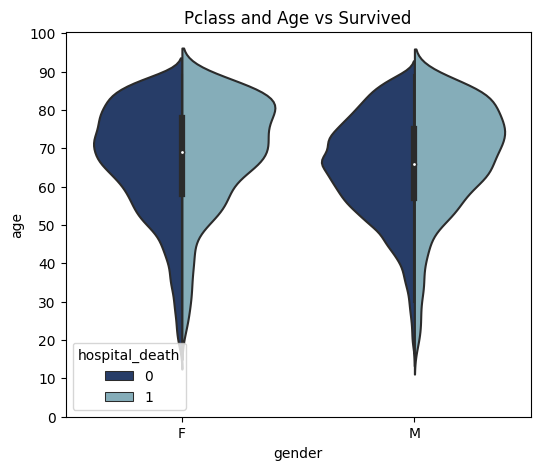

In [124]:
plt.figure(figsize=(6, 5))
sns.violinplot(x="gender", y="age", hue="hospital_death",
               data=data, split=True, palette=['#1c3a73', '#7cb1c2'])
plt.title('Pclass and Age vs Survived')
plt.yticks(range(0, 110, 10))
plt.show()

### `bun_apache` and `creaatinine_apache` imputation

In [127]:
# Create an IterativeImputer object
mice_imputer = IterativeImputer()

# Impute bun_apache and creatinine_apache using multiple imputation
columns_to_impute = ['bun_apache', 'creatinine_apache']

# Perform the imputation
data[columns_to_impute] = mice_imputer.fit_transform(data[columns_to_impute])
data[columns_to_impute].isnull().sum()

bun_apache           0
creatinine_apache    0
dtype: int64

In [129]:
data.dtypes

hospital_death                   int64
age                            float64
gender                          object
ethnicity                       object
bmi                            float64
apache_post_operative            int64
arf_apache                     float64
bun_apache                     float64
creatinine_apache              float64
urineoutput_apache             float64
heart_rate_apache              float64
map_apache                     float64
resprate_apache                float64
hematocrit_apache              float64
wbc_apache                     float64
sodium_apache                  float64
ventilated_apache              float64
diabetes_mellitus              float64
hepatic_failure                float64
solid_tumor_with_metastasis    float64
arf_apache                     float64
dtype: object

## Data Transformation

In [139]:
import category_encoders as ce

# Define a function to preprocess and transform input data
def fit_transform(input_df):
    # Initialize transformers and imputers
    ethnicity_transformer = ce.TargetEncoder()
    imputer = IterativeImputer(max_iter=10, random_state=0)
    st_x = StandardScaler()

    # Create a copy of the input DataFrame to avoid modifying the original data
    df = input_df.copy()

    # Encode 'ethnicity' column if it exists
    if 'ethnicity' in df.columns:
        df['ethnicity'] = ethnicity_transformer.fit_transform(
            df['ethnicity'].to_numpy().reshape(-1, 1), df['hospital_death'].to_numpy()
        )

    # Perform imputation and standardization on the feature matrix
    X = imputer.fit_transform(df.drop('hospital_death', axis=1).to_numpy())
    X = st_x.fit_transform(X)

    # Extract the target variable 'Class/ASD'
    Y = df['hospital_death'].to_numpy()

    # Return the preprocessed feature matrix, target variable, and transformers/imputers
    return X, Y, ethnicity_transformer, imputer, st_x

# Define a function to transform new data using pre-trained transformers and imputers
def transform(input_df, ethnicity_transformer, imputer, st_x):
    # Create a copy of the input DataFrame to avoid modifying the original data
    df = input_df.copy()

    # Encode 'ethnicity' column if it exists
    if 'ethnicity' in df.columns:
        df['ethnicity'] = ethnicity_transformer.transform(
            df['ethnicity'].to_numpy().reshape(-1, 1)
        )

    # Perform imputation and standardization on the feature matrix
    X = imputer.transform(df.drop('hospital_death', axis=1).to_numpy())
    X = st_x.transform(X)

    # Return the transformed feature matrix
    return X

In [140]:
# Define a function to compute various scores for model evaluation
def get_scores(Y_pred, Y):
    # Calculate confusion matrix, classification report, ROC AUC, and accuracy
    conf_matrix = confusion_matrix(Y_pred, Y)
    class_report = classification_report(Y_pred, Y)
    auc = roc_auc_score(Y_pred, Y)
    acc = accuracy_score(Y_pred, Y)

    # Return the computed scores
    return conf_matrix, class_report, auc, acc

# Define a function to print the computed scores
def print_scores(conf_matrix, class_report, auc, acc):
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)


# Feature Selection

[Determining which variables (demographics, vitals, lab results, APACHE scores, comorbidities) to include in the model.]

Vasoactive management considerations and rationale:
1. blood pressure
2. beats per minute
3. cardiogenic shock
4. heart rate
5. diastolic pressure
6. pulmonary artery catheter
7. pulmonary vascular resistance
8. systemic vascular resistance


In [ ]:
# create list of numerical, categorical, multinomial features
target_column = 'hospital_death'
numerical_columns = ['d1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
                     'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
                     'd1_mbp_noninvasive_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max',
                     'd1_sysbp_noninvasive_min']

# Model Building

======== Training Set ==========
AUC :  0.7501663109402625
Accuracy :  0.923853516834135
Confusion Matrix:
[[19134  1397]
 [  202   266]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     20531
           1       0.16      0.57      0.25       468

    accuracy                           0.92     20999
   macro avg       0.57      0.75      0.60     20999
weighted avg       0.97      0.92      0.94     20999

======== Test Set ==========
AUC :  0.7354128488302794
Accuracy :  0.9211111111111111
Confusion Matrix:
[[8177  614]
 [  96  113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      8791
           1       0.16      0.54      0.24       209

    accuracy                           0.92      9000
   macro avg       0.57      0.74      0.60      9000
weighted avg       0.97      0.92      0.94      9000



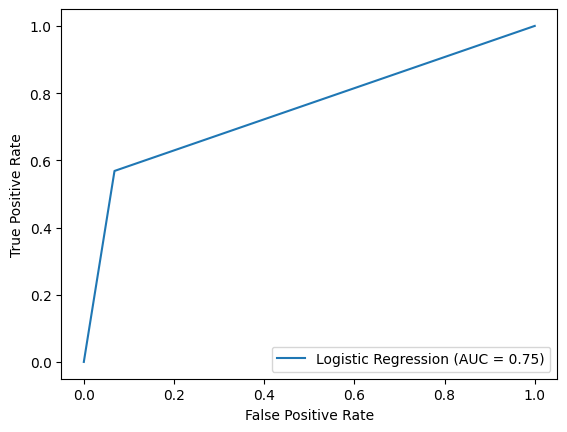

In [142]:
from sklearn.linear_model import LogisticRegression

data['gender'].replace({'F' : 1, 'M' : 0}, inplace=True)

# Splitting the dataset into training and test sets
train = data.sample(frac=0.7, random_state=10)  # 70% for training
test = data.drop(train.index)  # Remaining data for testing

# Feature engineering and preprocessing on the training set
X_train, Y_train, ethnicity_transformer, imputer, st_x = fit_transform(train)

# Preprocess and transform the test set
X_test = transform(test, ethnicity_transformer, imputer, st_x)
Y_test = test['hospital_death'].to_numpy()

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make predictions on the test and training sets
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculate evaluation metrics and scores for the test and training sets
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, Y_test)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, Y_train)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_pred_train, Y_train)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()

# Model Evaluation